In [66]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp
import torch.nn as nn

In [67]:
def remove_batchnorm(model):
    for child_name, child in model.named_children():
        if isinstance(child, nn.BatchNorm2d):
            setattr(model, child_name, nn.Identity())
        else:
            remove_batchnorm(child)

In [87]:
model = smp.Unet(
    encoder_name="resnet18",
    classes=1,
    decoder_use_batchnorm=False,
    in_channels=1,
).eval()
remove_batchnorm(model)

In [88]:
for name, parameter in model.named_parameters():
    if (".conv" in name and "weight" in name) or ("downsample.0.weight" in name):
        parameter.data = torch.ones_like(parameter.data)
    elif "bias" in name:
        parameter.data = torch.zeros_like(parameter.data)
    else:
        print(name)
model.segmentation_head[0].weight.data = torch.ones_like(model.segmentation_head[0].weight.data)

segmentation_head.0.weight


In [89]:
inputs = torch.zeros((1, 1, 512, 512))
inputs[0,0,0,0] = 1
with torch.inference_mode():
    output = model(inputs).numpy().squeeze()
    output[output>0] = 1

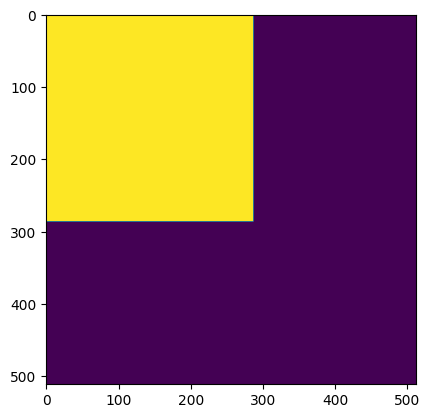

In [91]:
plt.figure()
plt.imshow(output)
plt.show()
plt.close()